# 5 Algorithms Classifier
## We used 5 algorithms Classifier
* SGD Classifier
* Random Forest Classifier
* XGB Classifier
* KNeighbors Classifier
* SVM



<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5408/media/bigleaves.jpg" width="800px">



## Data Description
The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.




## File descriptions
* train.csv - the training set
* test.csv - the test set
* sample_submission.csv - a sample submission file in the correct format
* images - the image files (each image is named with its corresponding id)
## Data fields
* id - an anonymous id unique to an image
* margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
* shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
* texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature


### Dataset Link

##### [Here](https://www.kaggle.com/c/leaf-classification/data)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


In [2]:
import zipfile

with zipfile.ZipFile('/kaggle/input/leaf-classification/sample_submission.csv.zip') as z_samp:
    z_samp.extractall()

In [3]:
import zipfile

with zipfile.ZipFile('/kaggle/input/leaf-classification/train.csv.zip') as z:
    z.extractall()

In [4]:
with zipfile.ZipFile('/kaggle/input/leaf-classification/images.zip') as z_img:
    z_img.extractall()
    
with zipfile.ZipFile('/kaggle/input/leaf-classification/test.csv.zip') as z_test:
    z_test.extractall()

In [5]:
os.listdir()

['sample_submission.csv',
 '__notebook__.ipynb',
 'images',
 'train.csv',
 'test.csv']

In [6]:
len(os.listdir('images'))

1584

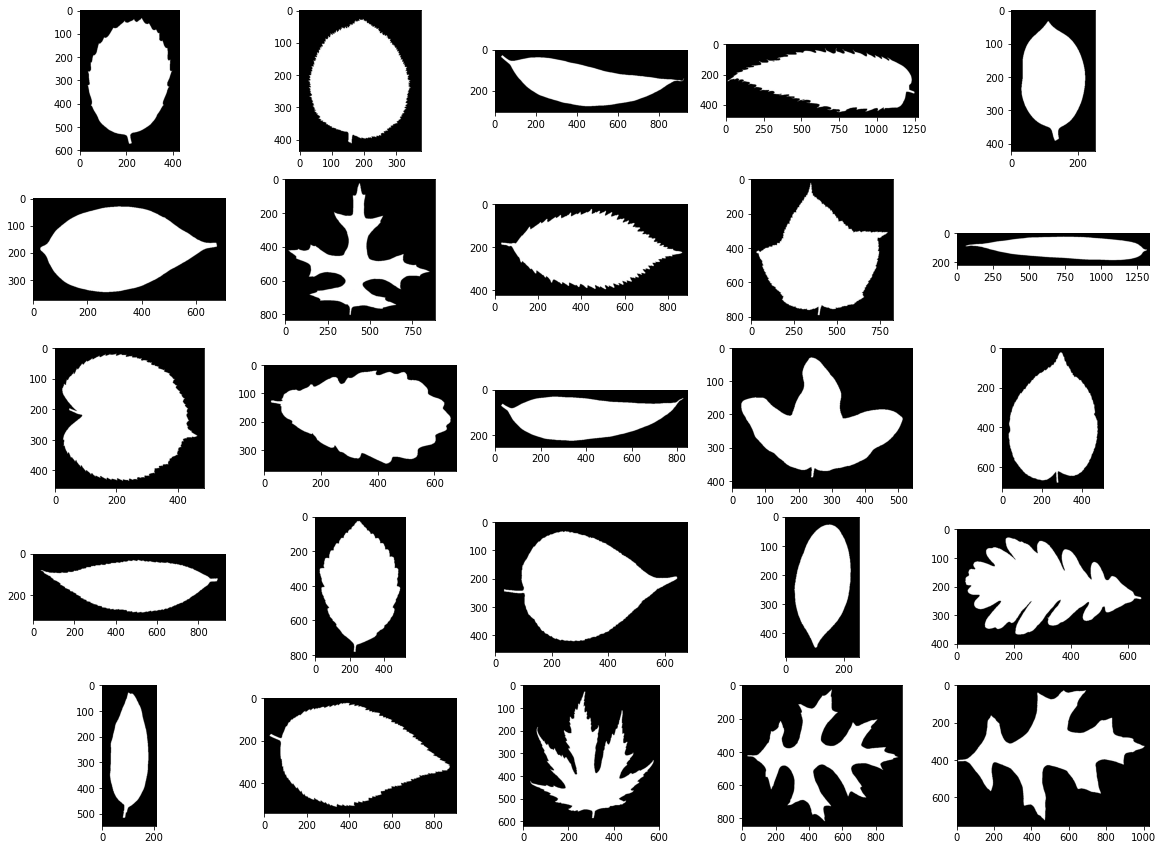

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/kaggle/working/images',j))
    plt.imshow(img)

In [8]:
df=pd.read_csv('train.csv',index_col=False)
dftest=pd.read_csv('test.csv',index_col=False)

In [9]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [10]:
dftest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(df.species)
labels=le.transform(df.species)
classes=list(le.classes_)

In [12]:
print(classes)


['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [13]:
print(dftest.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


In [14]:
df=df.drop(['id','species'],axis=1)
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

In [15]:
dftest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [17]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


In [18]:
print(f'Labels:',len(labels))

Labels: 990


In [19]:
uniquelables=np.unique(labels)
print(uniquelables)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


In [20]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), SGDClassifier())

print(model_1.fit(X_train,y_train))

print(model_1.score(X_test,y_test))


y_pred = model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
0.9595959595959596
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_2.fit(X_train,y_train))

print(model_2.score(X_test,y_test))

y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
0.9747474747474747
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [23]:
from sklearn import neighbors
model_3 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

print(model_3.fit(X_train,y_train))

print(f'score Model:',model_3.score(X_test,y_test))

y_pred = model_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
score Model: 0.9595959595959596
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [24]:
import xgboost as xgb
model_4 = make_pipeline(StandardScaler(),xgb.XGBClassifier())

print(model_4.fit(X_train,y_train))

print(f'score Model:',model_4.score(X_test,y_test))

y_pred = model_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:40:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='mult

In [25]:
from sklearn import svm
model_5= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_5.fit(X_train,y_train))

print(f'score Model:',model_5.score(X_test,y_test))

y_pred = model_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [26]:
models = pd.DataFrame({
    'Model': ['SGDClassifier','Random Forest Classifier','K Neighbors Classifier', 'XGB Classifier', 
              'svm'],

    'Score': [model_1.score(X_test,y_test)*100,
              model_2.score(X_test,y_test)*100,
              model_3.score(X_test,y_test)*100, 
              model_4.score(X_test,y_test)*100,
              model_5.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,XGB Classifier,83.333333
0,SGDClassifier,95.959596
2,K Neighbors Classifier,95.959596
1,Random Forest Classifier,97.474747
4,svm,98.484848


In [27]:
test_pred = model_5.predict(dftest)

In [28]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 68  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [29]:
sample_df=pd.read_csv('sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0       4         0.010101         0.010101   0.010101     0.010101   
1       7         0.010101         0.010101   0.010101     0.010101   
2       9         0.010101         0.010101   0.010101     0.010101   
3      12         0.010101         0.010101   0.010101     0.010101   
4      13         0.010101         0.010101   0.010101     0.010101   
..    ...              ...              ...        ...          ...   
589  1576         0.010101         0.010101   0.010101     0.010101   
590  1577         0.010101         0.010101   0.010101     0.010101   
591  1579         0.010101         0.010101   0.010101     0.010101   
592  1580         0.010101         0.010101   0.010101     0.010101   
593  1583         0.010101         0.010101   0.010101     0.010101   

     Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0         0.010101     0.010101         0.010101     0.010101     

In [30]:
output = pd.DataFrame({'Id': test_id,
                       
                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


In [31]:
final=pd.concat([output,sample_df],axis=1)
final.head()

,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,14,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
